In [163]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [164]:
import random
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms

In [165]:
device = torch.device('cuda' if torch.cuda.is_available else 'cpu')
print(device)

cuda


# FashionMINST dataset

## MLP model

In [166]:
random.seed(1)
np.random.seed(1)
torch.manual_seed(1)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [167]:
input_size = 784
n_classes = 10
learning_rate = 0.001
batch_size = 64
n_epochs = 50

In [168]:
train_dataset = datasets.FashionMNIST(root='/content/drive/MyDrive/datasets/fashionmnist', train=True,transform=transforms.ToTensor(),download=True)
train_loader = DataLoader(dataset=train_dataset,batch_size=batch_size, shuffle=True)
test_dataset = datasets.FashionMNIST(root='/content/drive/MyDrive/datasets/fashionmnist', train=False,transform=transforms.ToTensor(),download=True)
test_loader = DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=False)

In [169]:
train_dataset.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

9


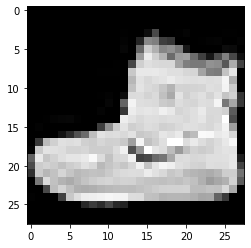

In [170]:
image, label = train_dataset[0]
plt.imshow(image.squeeze(), cmap='gray')
print(label)

In [171]:
class MLP(nn.Module):
  def __init__(self, input_size, n_classes):
    super().__init__()
    self.input_layer = nn.Linear(input_size, 100)
    self.hidden_layer_1 = nn.Linear(100,100)
    self.hidden_layer_2 = nn.Linear(100,50)
    self.hidden_layer_3 = nn.Linear(50,25)
    self.output_layer = nn.Linear(25, n_classes)
  
  def forward(self, X):
    X = self.input_layer(X)
    X = F.relu(X)
    X = self.hidden_layer_1(X)
    X = F.relu(X)
    X = self.hidden_layer_2(X)
    X = F.relu(X)
    X = self.hidden_layer_3(X)
    X = F.relu(X)
    X = self.output_layer(X)
    prob = F.softmax(X, dim = 1)
    return prob

In [172]:
model = MLP(input_size=input_size,n_classes=n_classes).to(device)
print(model)

MLP(
  (input_layer): Linear(in_features=784, out_features=100, bias=True)
  (hidden_layer_1): Linear(in_features=100, out_features=100, bias=True)
  (hidden_layer_2): Linear(in_features=100, out_features=50, bias=True)
  (hidden_layer_3): Linear(in_features=50, out_features=25, bias=True)
  (output_layer): Linear(in_features=25, out_features=10, bias=True)
)


In [173]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=learning_rate)

In [174]:
for epoch in range(n_epochs):
  for batch_idx, (data,targets) in enumerate(train_loader):
    
    data = data.to(device)
    targets = targets.to(device)


    data = data.reshape(data.shape[0],-1)

    scores = model(data)
    loss = criterion(scores, targets)

    optimizer.zero_grad()
    loss.backward()

    optimizer.step()

    if (batch_idx + 1) % 100 == 0:
      print(f'Epoch {epoch+1}/{n_epochs}, Batch {batch_idx+1}, Loss: {loss.item():.2f}')

Epoch 1/50, Batch 100, Loss: 1.98
Epoch 1/50, Batch 200, Loss: 1.81
Epoch 1/50, Batch 300, Loss: 1.81
Epoch 1/50, Batch 400, Loss: 1.80
Epoch 1/50, Batch 500, Loss: 1.87
Epoch 1/50, Batch 600, Loss: 1.83
Epoch 1/50, Batch 700, Loss: 1.80
Epoch 1/50, Batch 800, Loss: 1.89
Epoch 1/50, Batch 900, Loss: 1.76
Epoch 2/50, Batch 100, Loss: 1.76
Epoch 2/50, Batch 200, Loss: 1.88
Epoch 2/50, Batch 300, Loss: 1.84
Epoch 2/50, Batch 400, Loss: 1.79
Epoch 2/50, Batch 500, Loss: 1.71
Epoch 2/50, Batch 600, Loss: 1.71
Epoch 2/50, Batch 700, Loss: 1.72
Epoch 2/50, Batch 800, Loss: 1.72
Epoch 2/50, Batch 900, Loss: 1.64
Epoch 3/50, Batch 100, Loss: 1.74
Epoch 3/50, Batch 200, Loss: 1.74
Epoch 3/50, Batch 300, Loss: 1.71
Epoch 3/50, Batch 400, Loss: 1.69
Epoch 3/50, Batch 500, Loss: 1.77
Epoch 3/50, Batch 600, Loss: 1.60
Epoch 3/50, Batch 700, Loss: 1.60
Epoch 3/50, Batch 800, Loss: 1.70
Epoch 3/50, Batch 900, Loss: 1.66
Epoch 4/50, Batch 100, Loss: 1.65
Epoch 4/50, Batch 200, Loss: 1.66
Epoch 4/50, Ba

In [175]:
def get_accuracy(loader,model):
  if loader.dataset.train:
    print('Getting accuracy on training data.')
  else:
    print('Getting accuracy on testing data.')
  n_corrects = 0
  n_samples = 0
  model.eval()

  with torch.no_grad():
    for x, y in loader:
      x = x.to(device)
      y = y.to(device)
      x = x.reshape(x.shape[0],-1)

      scores = model(x)
      _,y_pred = scores.max(1)
      n_corrects += (y_pred == y).sum()
      n_samples += y_pred.size(0)

    print(f'We got {n_corrects}/{n_samples} correct. Accuracy = {float(n_corrects)/float(n_samples)*100.0:.2f}')
  model.train()

In [176]:
get_accuracy(train_loader, model)
get_accuracy(test_loader, model)

Getting accuracy on training data.
We got 52798/60000 correct. Accuracy = 88.00
Getting accuracy on testing data.
We got 8586/10000 correct. Accuracy = 85.86


##**LeNet-5**

In [179]:
random.seed(1)
np.random.seed(1)
torch.manual_seed(1)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [180]:
n_classes = 10
learning_rate = 0.001
batch_size = 64
n_epochs = 50

In [181]:
transforms = transforms.Compose([transforms.Resize((32,32)), transforms.ToTensor()])

In [182]:
train_dataset = datasets.FashionMNIST(root='/content/drive/MyDrive/datasets/mnist', train=True,transform=transforms,download=True)
train_loader = DataLoader(dataset=train_dataset,batch_size=batch_size, shuffle=True)
test_dataset = datasets.FashionMNIST(root='/content/drive/MyDrive/datasets/mnist', train=False,transform=transforms,download=True)
test_loader = DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=False)

In [183]:
class LaNet5(nn.Module):
  def __init__(self, n_classes):
    super().__init__()
    self.model = nn.Sequential(
        nn.Conv2d(in_channels=1, out_channels=6,kernel_size=5,stride=1),
        nn.Tanh(),
        nn.AvgPool2d(kernel_size=2),
        nn.Conv2d(in_channels=6,out_channels=16,kernel_size=5,stride=1),
        nn.Tanh(),
        nn.AvgPool2d(kernel_size=2),
        nn.Conv2d(in_channels=16,out_channels=120,kernel_size=5,stride=1),
        nn.Tanh(),
        nn.Flatten(),
        nn.Linear(in_features=120,out_features=84),
        nn.Tanh(),
        nn.Linear(in_features=84,out_features=n_classes),
        nn.Softmax(dim=1)
        )
  def forward(self, X):
    prob = self.model(X)
    return prob

In [184]:
model = LaNet5(n_classes=n_classes).to(device)
print(model)

LaNet5(
  (model): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): Tanh()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Tanh()
    (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (6): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
    (7): Tanh()
    (8): Flatten(start_dim=1, end_dim=-1)
    (9): Linear(in_features=120, out_features=84, bias=True)
    (10): Tanh()
    (11): Linear(in_features=84, out_features=10, bias=True)
    (12): Softmax(dim=1)
  )
)


In [185]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=learning_rate)

In [186]:
for epoch in range(n_epochs):
  for batch_idx, (data,targets) in enumerate(train_loader):
    
    data = data.to(device)
    targets = targets.to(device)


    #data = data.reshape(data.shape[0],-1)

    scores = model(data)
    loss = criterion(scores, targets)

    optimizer.zero_grad()
    loss.backward()

    optimizer.step()

    if (batch_idx + 1) % 100 == 0:
      print(f'Epoch {epoch+1}/{n_epochs}, Batch {batch_idx+1}, Loss: {loss.item():.2f}')

Epoch 1/50, Batch 100, Loss: 1.86
Epoch 1/50, Batch 200, Loss: 1.74
Epoch 1/50, Batch 300, Loss: 1.75
Epoch 1/50, Batch 400, Loss: 1.61
Epoch 1/50, Batch 500, Loss: 1.78
Epoch 1/50, Batch 600, Loss: 1.67
Epoch 1/50, Batch 700, Loss: 1.72
Epoch 1/50, Batch 800, Loss: 1.64
Epoch 1/50, Batch 900, Loss: 1.63
Epoch 2/50, Batch 100, Loss: 1.62
Epoch 2/50, Batch 200, Loss: 1.64
Epoch 2/50, Batch 300, Loss: 1.64
Epoch 2/50, Batch 400, Loss: 1.67
Epoch 2/50, Batch 500, Loss: 1.62
Epoch 2/50, Batch 600, Loss: 1.60
Epoch 2/50, Batch 700, Loss: 1.61
Epoch 2/50, Batch 800, Loss: 1.65
Epoch 2/50, Batch 900, Loss: 1.60
Epoch 3/50, Batch 100, Loss: 1.61
Epoch 3/50, Batch 200, Loss: 1.60
Epoch 3/50, Batch 300, Loss: 1.59
Epoch 3/50, Batch 400, Loss: 1.60
Epoch 3/50, Batch 500, Loss: 1.64
Epoch 3/50, Batch 600, Loss: 1.58
Epoch 3/50, Batch 700, Loss: 1.64
Epoch 3/50, Batch 800, Loss: 1.58
Epoch 3/50, Batch 900, Loss: 1.59
Epoch 4/50, Batch 100, Loss: 1.69
Epoch 4/50, Batch 200, Loss: 1.55
Epoch 4/50, Ba

In [187]:
def get_accuracy(loader,model):
  if loader.dataset.train:
    print('Getting accuracy on training data.')
  else:
    print('Getting accuracy on testing data.')
  n_corrects = 0
  n_samples = 0
  model.eval()

  with torch.no_grad():
    for x, y in loader:
      x = x.to(device)
      y = y.to(device)
      #x = x.reshape(x.shape[0],-1)

      scores = model(x)
      _,y_pred = scores.max(1)
      n_corrects += (y_pred == y).sum()
      n_samples += y_pred.size(0)

    print(f'We got {n_corrects}/{n_samples} correct. Accuracy = {float(n_corrects)/float(n_samples)*100.0:.2f}')
  model.train()

In [188]:
get_accuracy(train_loader, model)
get_accuracy(test_loader,model)

Getting accuracy on training data.
We got 56185/60000 correct. Accuracy = 93.64
Getting accuracy on testing data.
We got 8820/10000 correct. Accuracy = 88.20


# CIFAR-10 dataset

## MLP model

In [189]:
random.seed(1)
np.random.seed(1)
torch.manual_seed(1)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [190]:
input_size = 3072
n_classes = 10
learning_rate = 0.001
batch_size = 64
n_epochs = 50

In [192]:
train_dataset = datasets.CIFAR10(root='/content/drive/MyDrive/datasets/CIFAR10', train=True,transform=transforms,download=True)
train_loader = DataLoader(dataset=train_dataset,batch_size=batch_size, shuffle=True)
test_dataset = datasets.CIFAR10(root='/content/drive/MyDrive/datasets/CIFAR10', train=False,transform=transforms,download=True)
test_loader = DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [193]:
train_dataset.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

6


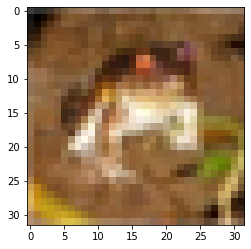

In [194]:
 image, label = train_dataset[0]
 plt.imshow(image.permute((1, 2, 0)))
 print(label)

In [195]:
class MLP(nn.Module):
  def __init__(self, input_size, n_classes):
    super().__init__()
    self.input_layer = nn.Linear(input_size, 1024)
    self.hidden_layer_1 = nn.Linear(1024,512)
    self.hidden_layer_2 = nn.Linear(512,256)
    self.hidden_layer_3 = nn.Linear(256,64)
    self.output_layer = nn.Linear(64, n_classes)
  
  def forward(self, X):
    X = self.input_layer(X)
    X = F.relu(X)
    X = self.hidden_layer_1(X)
    X = F.relu(X)
    X = self.hidden_layer_2(X)
    X = F.relu(X)
    X = self.hidden_layer_3(X)
    X = F.relu(X)
    X = self.output_layer(X)
    prob = F.softmax(X, dim = 1)
    return prob

In [196]:
model = MLP(input_size=input_size,n_classes=n_classes).to(device)
print(model)

MLP(
  (input_layer): Linear(in_features=3072, out_features=1024, bias=True)
  (hidden_layer_1): Linear(in_features=1024, out_features=512, bias=True)
  (hidden_layer_2): Linear(in_features=512, out_features=256, bias=True)
  (hidden_layer_3): Linear(in_features=256, out_features=64, bias=True)
  (output_layer): Linear(in_features=64, out_features=10, bias=True)
)


In [197]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=learning_rate)

In [198]:
for epoch in range(n_epochs):
  for batch_idx, (data,targets) in enumerate(train_loader):
    
    data = data.to(device)
    targets = targets.to(device)


    data = data.reshape(data.shape[0],-1)

    scores = model(data)
    loss = criterion(scores, targets)

    optimizer.zero_grad()
    loss.backward()

    optimizer.step()

    if (batch_idx + 1) % 100 == 0:
      print(f'Epoch {epoch+1}/{n_epochs}, Batch {batch_idx+1}, Loss: {loss.item():.2f}')

Epoch 1/50, Batch 100, Loss: 2.23
Epoch 1/50, Batch 200, Loss: 2.23
Epoch 1/50, Batch 300, Loss: 2.19
Epoch 1/50, Batch 400, Loss: 2.22
Epoch 1/50, Batch 500, Loss: 2.21
Epoch 1/50, Batch 600, Loss: 2.21
Epoch 1/50, Batch 700, Loss: 2.18
Epoch 2/50, Batch 100, Loss: 2.22
Epoch 2/50, Batch 200, Loss: 2.11
Epoch 2/50, Batch 300, Loss: 2.09
Epoch 2/50, Batch 400, Loss: 2.20
Epoch 2/50, Batch 500, Loss: 2.13
Epoch 2/50, Batch 600, Loss: 2.00
Epoch 2/50, Batch 700, Loss: 2.11
Epoch 3/50, Batch 100, Loss: 2.14
Epoch 3/50, Batch 200, Loss: 2.09
Epoch 3/50, Batch 300, Loss: 2.10
Epoch 3/50, Batch 400, Loss: 2.17
Epoch 3/50, Batch 500, Loss: 2.14
Epoch 3/50, Batch 600, Loss: 2.20
Epoch 3/50, Batch 700, Loss: 2.15
Epoch 4/50, Batch 100, Loss: 2.09
Epoch 4/50, Batch 200, Loss: 2.13
Epoch 4/50, Batch 300, Loss: 2.07
Epoch 4/50, Batch 400, Loss: 2.17
Epoch 4/50, Batch 500, Loss: 2.21
Epoch 4/50, Batch 600, Loss: 2.08
Epoch 4/50, Batch 700, Loss: 2.09
Epoch 5/50, Batch 100, Loss: 2.08
Epoch 5/50, Ba

In [199]:
def get_accuracy(loader,model):
  if loader.dataset.train:
    print('Getting accuracy on training data.')
  else:
    print('Getting accuracy on testing data.')
  n_corrects = 0
  n_samples = 0
  model.eval()

  with torch.no_grad():
    for x, y in loader:
      x = x.to(device)
      y = y.to(device)
      x = x.reshape(x.shape[0],-1)

      scores = model(x)
      _,y_pred = scores.max(1)
      n_corrects += (y_pred == y).sum()
      n_samples += y_pred.size(0)

    print(f'We got {n_corrects}/{n_samples} correct. Accuracy = {float(n_corrects)/float(n_samples)*100.0:.2f}')
  model.train()

In [200]:
get_accuracy(train_loader, model)
get_accuracy(test_loader, model)

Getting accuracy on training data.
We got 20852/50000 correct. Accuracy = 41.70
Getting accuracy on testing data.
We got 4052/10000 correct. Accuracy = 40.52


##**LeNet-5**

In [201]:
n_classes = 10
learning_rate = 0.001
batch_size = 64
n_epochs = 50

In [202]:
# transforms = transforms.Compose([transforms.Resize((32,32)), transforms.ToTensor()])

In [203]:
train_dataset = datasets.CIFAR10(root='/content/drive/MyDrive/datasets/cifar10', train=True,transform=transforms,download=True)
train_loader = DataLoader(dataset=train_dataset,batch_size=batch_size, shuffle=True)
test_dataset = datasets.CIFAR10(root='/content/drive/MyDrive/datasets/cifar10', train=False,transform=transforms,download=True)
test_loader = DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [204]:
class LaNet5(nn.Module):
  def __init__(self, n_classes):
    super().__init__()
    self.model = nn.Sequential(
        nn.Conv2d(in_channels=3, out_channels=6,kernel_size=5,stride=1),
        nn.Tanh(),
        nn.AvgPool2d(kernel_size=2),
        nn.Conv2d(in_channels=6,out_channels=16,kernel_size=5,stride=1),
        nn.Tanh(),
        nn.AvgPool2d(kernel_size=2),
        nn.Conv2d(in_channels=16,out_channels=120,kernel_size=5,stride=1),
        nn.Tanh(),
        nn.Flatten(),
        nn.Linear(in_features=120,out_features=84),
        nn.Tanh(),
        nn.Linear(in_features=84,out_features=n_classes),
        nn.Softmax(dim=1)
        )
  def forward(self, X):
    prob = self.model(X)
    return prob

In [205]:
model = LaNet5(n_classes=n_classes).to(device)
print(model)

LaNet5(
  (model): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): Tanh()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Tanh()
    (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (6): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
    (7): Tanh()
    (8): Flatten(start_dim=1, end_dim=-1)
    (9): Linear(in_features=120, out_features=84, bias=True)
    (10): Tanh()
    (11): Linear(in_features=84, out_features=10, bias=True)
    (12): Softmax(dim=1)
  )
)


In [206]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=learning_rate)

In [207]:
for epoch in range(n_epochs):
  for batch_idx, (data,targets) in enumerate(train_loader):
    
    data = data.to(device)
    targets = targets.to(device)


    #data = data.reshape(data.shape[0],-1)

    scores = model(data)
    loss = criterion(scores, targets)

    optimizer.zero_grad()
    loss.backward()

    optimizer.step()

    if (batch_idx + 1) % 100 == 0:
      print(f'Epoch {epoch+1}/{n_epochs}, Batch {batch_idx+1}, Loss: {loss.item():.2f}')

Epoch 1/50, Batch 100, Loss: 2.22
Epoch 1/50, Batch 200, Loss: 2.14
Epoch 1/50, Batch 300, Loss: 2.20
Epoch 1/50, Batch 400, Loss: 2.12
Epoch 1/50, Batch 500, Loss: 1.99
Epoch 1/50, Batch 600, Loss: 2.11
Epoch 1/50, Batch 700, Loss: 2.01
Epoch 2/50, Batch 100, Loss: 2.12
Epoch 2/50, Batch 200, Loss: 2.09
Epoch 2/50, Batch 300, Loss: 2.03
Epoch 2/50, Batch 400, Loss: 2.06
Epoch 2/50, Batch 500, Loss: 2.10
Epoch 2/50, Batch 600, Loss: 2.10
Epoch 2/50, Batch 700, Loss: 2.13
Epoch 3/50, Batch 100, Loss: 2.05
Epoch 3/50, Batch 200, Loss: 1.99
Epoch 3/50, Batch 300, Loss: 2.05
Epoch 3/50, Batch 400, Loss: 2.07
Epoch 3/50, Batch 500, Loss: 2.03
Epoch 3/50, Batch 600, Loss: 2.08
Epoch 3/50, Batch 700, Loss: 2.00
Epoch 4/50, Batch 100, Loss: 2.02
Epoch 4/50, Batch 200, Loss: 1.96
Epoch 4/50, Batch 300, Loss: 1.90
Epoch 4/50, Batch 400, Loss: 2.03
Epoch 4/50, Batch 500, Loss: 2.00
Epoch 4/50, Batch 600, Loss: 2.07
Epoch 4/50, Batch 700, Loss: 2.06
Epoch 5/50, Batch 100, Loss: 1.94
Epoch 5/50, Ba

In [208]:
def get_accuracy(loader,model):
  if loader.dataset.train:
    print('Getting accuracy on training data.')
  else:
    print('Getting accuracy on testing data.')
  n_corrects = 0
  n_samples = 0
  model.eval()

  with torch.no_grad():
    for x, y in loader:
      x = x.to(device)
      y = y.to(device)
      #x = x.reshape(x.shape[0],-1)

      scores = model(x)
      _,y_pred = scores.max(1)
      n_corrects += (y_pred == y).sum()
      n_samples += y_pred.size(0)

    print(f'We got {n_corrects}/{n_samples} correct. Accuracy = {float(n_corrects)/float(n_samples)*100.0:.2f}')
  model.train()

In [209]:
get_accuracy(train_loader, model)
get_accuracy(test_loader,model)

Getting accuracy on training data.
We got 35944/50000 correct. Accuracy = 71.89
Getting accuracy on testing data.
We got 5099/10000 correct. Accuracy = 50.99
